# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Linear Regression Project(Auto Scout)</b></p>

## About Dataset

The **Auto Scout** dataset was obtained in 2019 from the online car trading company [AutoScout24](https://www.autoscout24.com) and contains various features of 9 different car models.
- In this scenario, we will use regression algorithms to predict car prices.
- To achieve better results, we will attempt to enhance the models' performance by tuning their hyperparameters.
  
- We will determine the importance of features for the model and adjust it by selecting the most important features for resource efficiency.

- Finally, we will compare the performance of the algorithms.

- Additionally, we can further refine the algorithm with the best prediction accuracy.


** Features**

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.


# Import Modules and Load Data 

In [1]:
# Importing libraries
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# Loading dataset
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

# Exploratory Data Analysis

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [4]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.duplicated().sum()

1673

In [6]:
# Removes duplicate rows from the DataFrame.
df.drop_duplicates(inplace=True)

In [7]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [8]:
df.describe(include="object").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
Type,14242,5,Used,10172
Fuel,14242,4,Benzine,7558
Comfort_Convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14242,659,Alloy wheels,5010
Safety_Security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14242,3,Metallic,13682


In [9]:
# Generate a quick summary of the dataset, providing an overview of each column
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14242  │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ price              │   0 │     0 │   18100 │    7421 │  4950 │  12950 │  16950 │  21900 │   74600 │  ▇▇▁   │  │
│ │ km                 │   0 │     0 │   32580 │   36860 │     0 │   3898 │  21000 │  47000 │  317000 │   ▇▂   │  │
│ │ Gears              │   0 │     0 │    5.94 │  0.7028 │     5 │      5 │      6 │      6 │       8 │ ▃ ▇ ▃  │  │
│ │ age                │   0 │     0 │   1.415 │    1.11 │     0 │      0 │      1 │      2 │       3 │ ▇ ▇ ▅▆ │  │
│ │ Previous_Owners    │   0 │     0 │   1.041 │  0.3374 │     0 │      1 │      1 │      1 │       4 │   ▇ ▁  │  │
│ │ hp_kW              │   0 │     0 │   88.71 │   26.55 │    40 │     66 │     85 │    103 │     294 │  ▇▇▂   │  │
│ │ Inspection_new     │   0 │     0 │  0.2563 │  0.4366 │     0 │      0 │      0 │      1 │       1 │ ▇    ▃ │  │
│ │ Displacement_cc    │   0 │     0 │    1433 │   277.5 │   890 │   1229 │   1461 │   1598 │    2967 │  ▆▇▇▂  │  │
│ │ Weight_kg          │   0 │     0 │    1342 │   201.2 │   840 │   1165 │   1320 │   1487 │    2471 │  ▁▇▃▁  │  │
│ │ cons_comb          │   0 │     0 │   4.825 │  0.8622 │     3 │    4.1 │    4.8 │    5.4 │     9.1 │  ▅▇▇▁  │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make_model                           │     0 │         0 │                        2 │                28484 │  │
│ │ body_type                            │     0 │         0 │                      1.2 │                17647 │  │
│ │ vat                                  │     0 │         0 │                        2 │                28484 │  │
│ │ Type                                 │     0 │         0 │                      1.1 │                15147 │  │
│ │ Fuel                                 │     0 │         0 │                        1 │                14242 │  │
│ │ Comfort_Convenience                  │     0 │         0 │                       21 │               297923 │  │
│ │ Entertainment_Media                  │     0 │      

In [10]:
# Number of missing (null) values for each column.
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

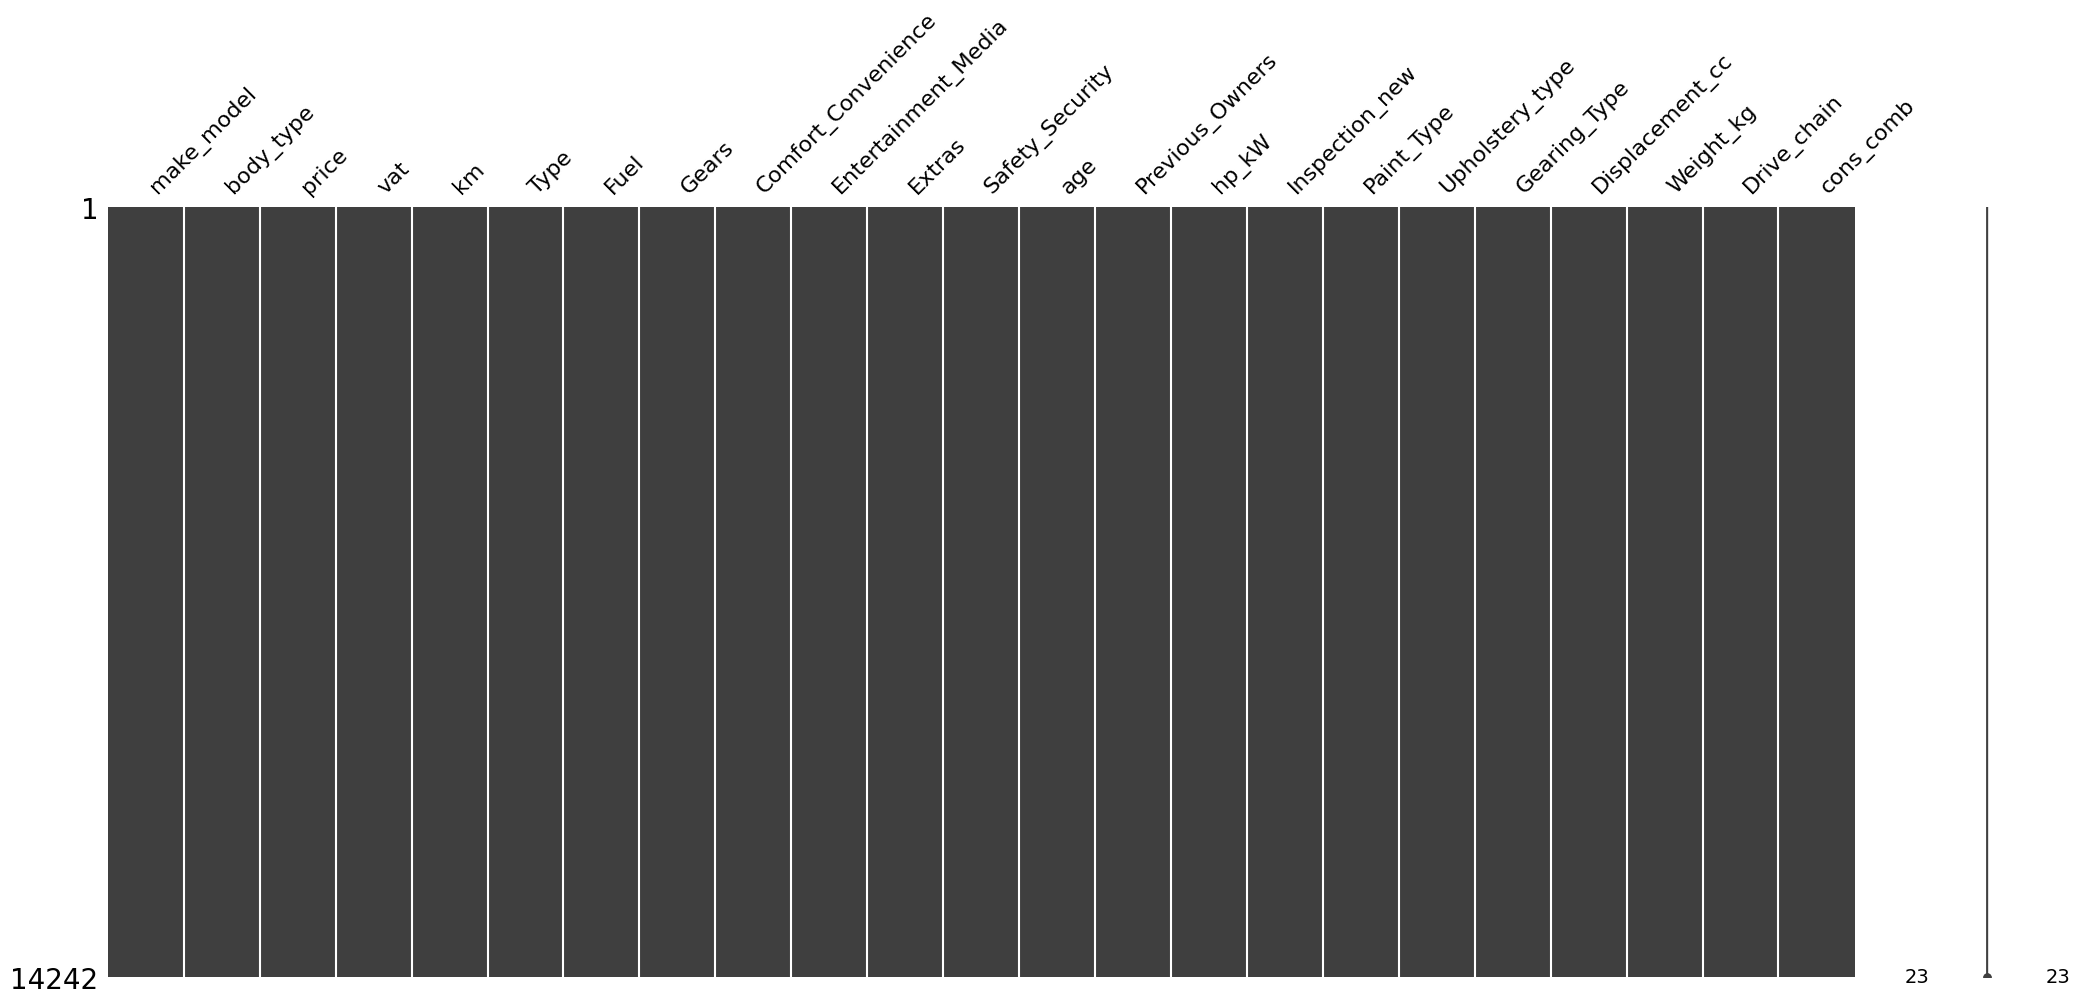

In [11]:
# Visualizes the missing values in the DataFrame using a missing value matrix from the missingno library.
import missingno as msno
msno.matrix(df);

In [12]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [13]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

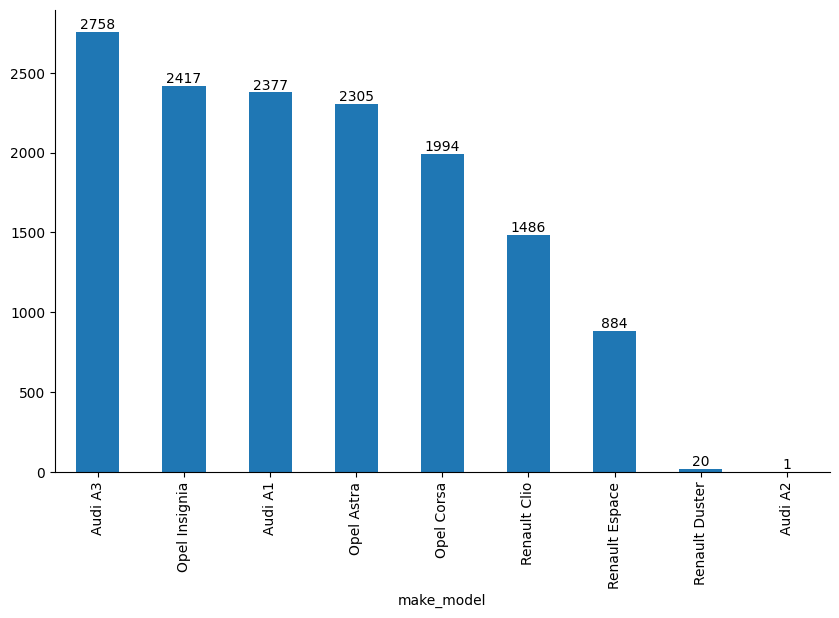

In [14]:
# This code calculates the number of unique values in the "make_model" column of our DataFrame and visualizes these counts in a bar chart.

ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
    
ax.bar_label(ax.containers[0]);

# for p in ax.patches:
# ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [15]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [16]:
df.drop(index=[2614], inplace =True)

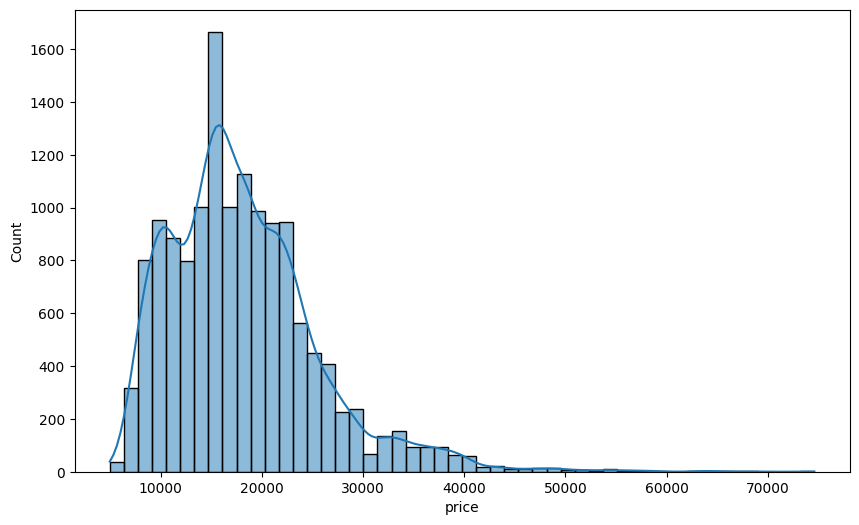

In [17]:
# Since linear models are very sensitive to outliers, use histplot to detect outliers in the data

# Additionally, looking at the histplot for the entire dataset might mislead us about outliers. 
# To detect outliers, we need to group the data (e.g., Audi A3, Audi A1, Renault Clio, etc.) and identify outliers accordingly.

sns.histplot(df.price, bins=50, kde=True);

The sensitivity of a model to outliers depends on its structural characteristics and the optimization techniques it employs. Linear models are generally sensitive to outliers because they look for linear relationships between data points, and loss functions like MSE magnify large errors. Some models (e.g., decision trees, robust regression) are more resistant to outliers and are less affected by such data. Therefore, when choosing a model, the characteristics of the dataset and the presence of outliers should be taken into account.

In [18]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
15907,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
15908,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
15909,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


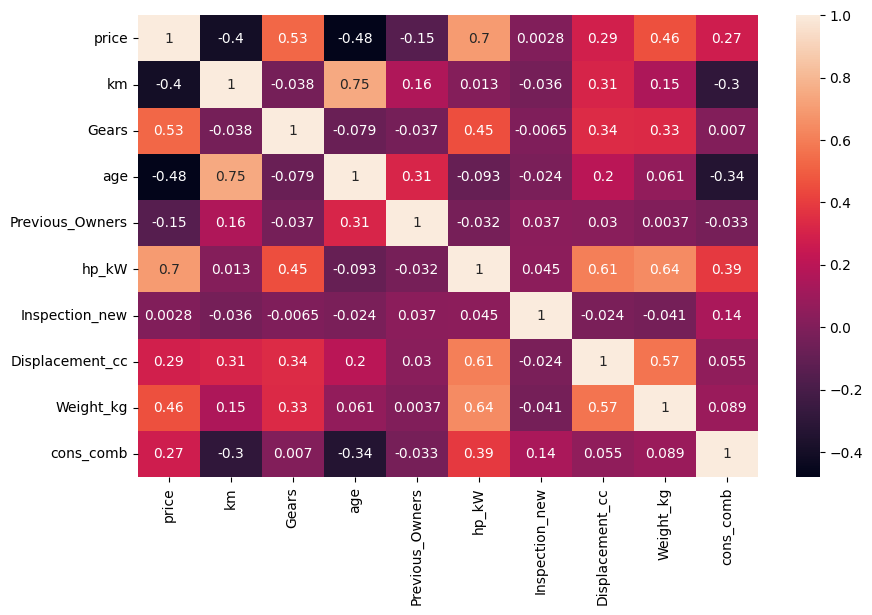

In [19]:
sns.heatmap(df_numeric.corr(), annot =True);

### Multicollinarity

In [20]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# checking multicollinearity for correlation values between +0.9 and +1.


False

In [21]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# checking multicollinearity for correlation values between -0.9 and -1.


False

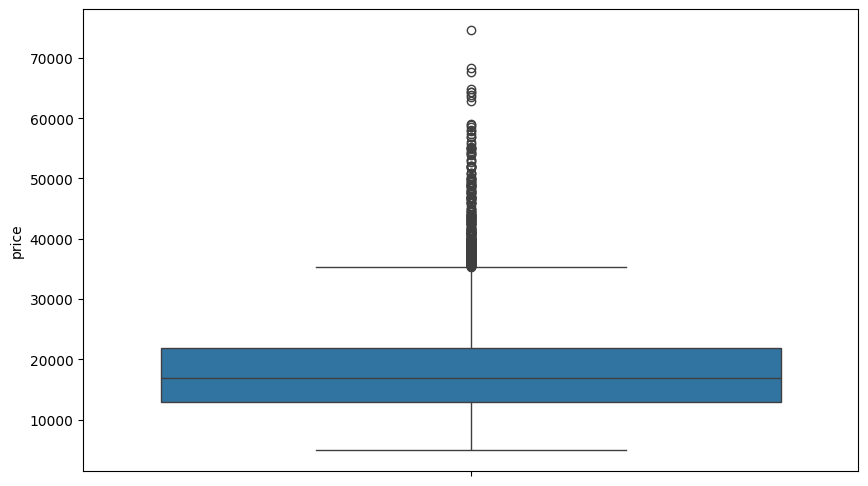

In [22]:
sns.boxplot(df.price);

# We can also gain insights about outliers through a boxplot, but our evaluation will be based on groups in the data 
# (e.g., Audi A1, Audi A3, Renault Clio, etc.) rather than the entire dataset.

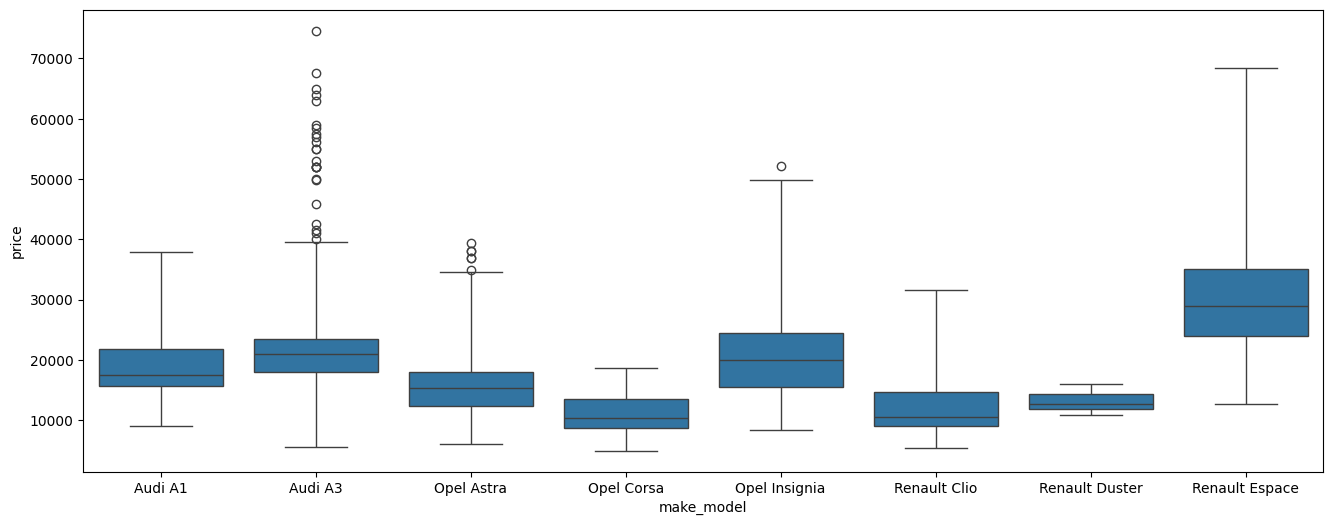

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()
# Steps to calculate the IQR:

# 1. Sort the data in ascending order.
# 2. Calculate the first and third quartiles, representing 25% and 75% of the data, respectively.
# 3. Compute the IQR by subtracting the first quartile from the third quartile.

# Q1 = df.groupby('make_model')['price'].quantile(0.25)
# Q3 = df.groupby('make_model')['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_lim = Q1 - 1.5 * IQR
# upper_lim = Q3 + 1.5 * IQR

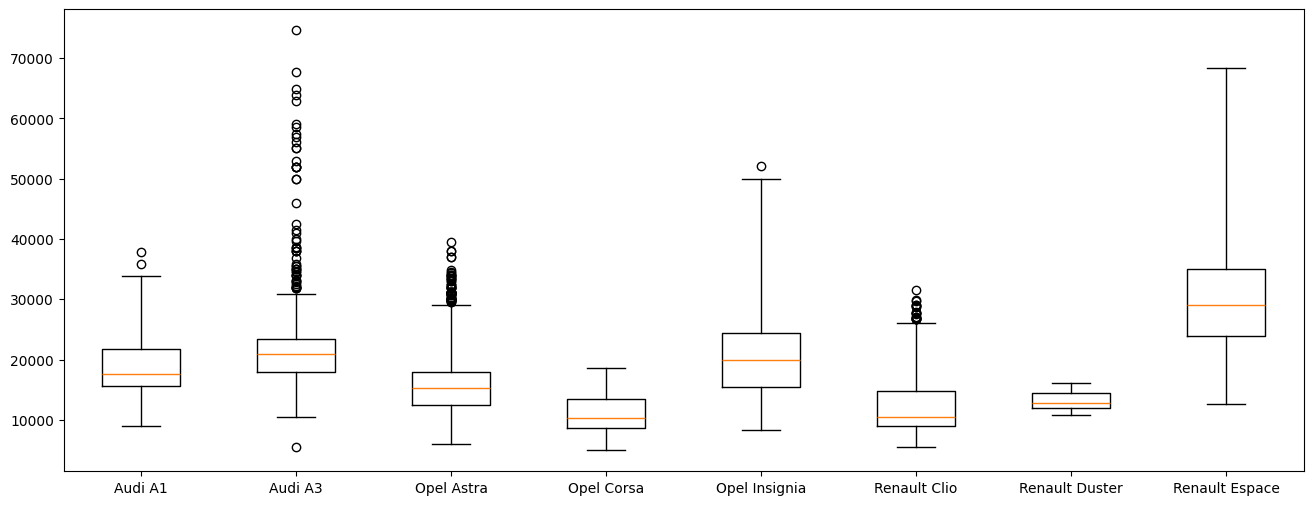

In [24]:
# Seaborn's boxplot function uses the same 'whis' value for all categories, so 
# we will use matplotlib's boxplot function to plot each category separately.

whisker_values = {
    'Audi A1': 2.0,
    'Audi A3': 1.5,
    'Opel Astra': 2.0,
    'Opel Corsa': 2.5,
    'Opel Insignia': 3.0,
    'Renault Clio': 2.0,
    'Renault Duster': 1.5,
    'Renault Espace': 3.0
}

plt.figure(figsize=(16,6))

for i, make_model in enumerate(whisker_values.keys()):
    model_data = df[df['make_model'] == make_model]['price']
    plt.boxplot(model_data, positions=[i], whis=whisker_values[make_model], widths=0.5)
    
plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()

In [25]:
# According to the 1.5 whisker value, identifying the observations in each group that could be considered outliers.

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


The **get_dummies()** method converts categorical columns into new columns using binary encoding.

Each category is encoded as a feature, where the presence of the feature is represented by 1 and its absence by 0.

In [26]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())
    
# <20 leaves a 20-character space from the left for alignment up to the ":" symbol, and the feature names are written within this space.
# The ":" symbol is aligned uniformly across all rows.

make_model          : 8
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [27]:
# This code parses the comma-separated text in each cell of our columns 
# and creates a new DataFrame where each item in the text is represented as a separate column.

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [28]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [29]:
df = pd.get_dummies(df, drop_first =True)

# The drop_first=True parameter removes the column for the first category of each feature. 
# This is done to prevent overfitting and multicollinearity.

In [30]:
bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [31]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [32]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


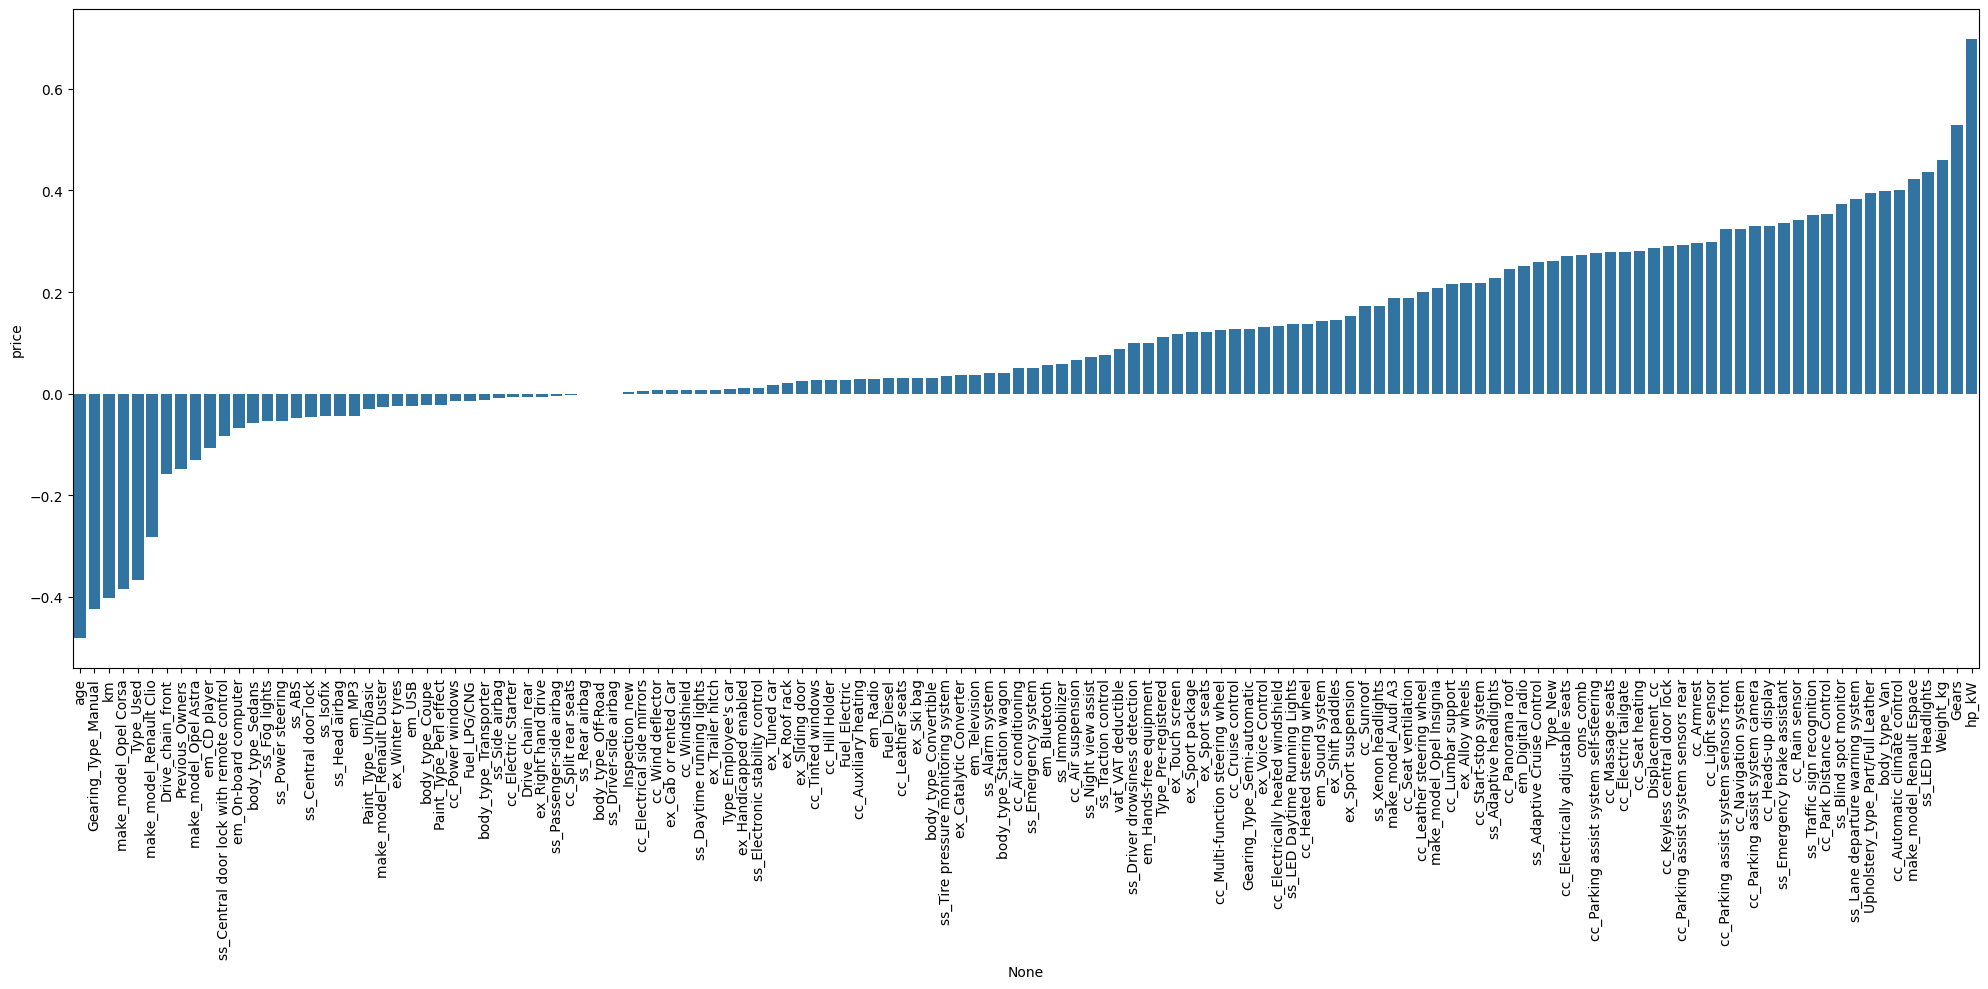

In [33]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# Visualizing the correlations between the features and the target.

# Train | Test Split

In [34]:
X= df.drop(columns="price")
y= df.price

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data into training and testing sets using the train_test_split function to train the model and make predictions later.

In [36]:
# Define our function to compare the metrics of the train and test sets.

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

# Implement Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression() 

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


The R² score can increase with each new feature added to the model, which can sometimes be misleading. Adjusted R² accounts for the number of features in the model, reducing this bias, and is generally a more reliable performance metric for models with multiple features. Therefore, it is important to consider Adjusted R² to better understand the true performance of the model.

In [41]:
# Calculates the R² value of the model

def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)     
    n = df.shape[0]                     
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [42]:
y_pred = lm.predict(X_test)

# Obtaining our predictions (y_pred) from the model to use within the function defined above.

In [43]:
adj_r2(y_test, y_pred, df)

0.8828492602064284

### Cross-Validation
The use of cross-validation and scoring metrics is critically important for evaluating a model's generalization ability and detecting overfitting. These techniques are used to more accurately understand the model's performance on real-world data.

In [44]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [45]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.302,0.006,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,0.558,0.007,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.418,0.005,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.663,0.011,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,0.747,0.010,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.415,0.010,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.728,0.010,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.464,0.011,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.686,0.012,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,0.746,0.012,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [46]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We observe that the scores between the train and validation sets are close to each other. 
# There is no overfitting.

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [47]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [48]:
2501/df.price.mean()

# The model makes an average error of 13.9%.

0.13817480842212715

### Prediction Error

In [49]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

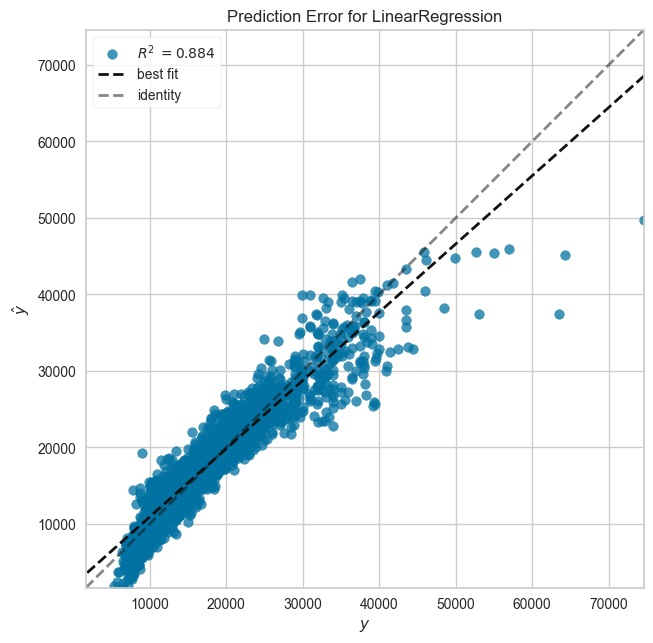

In [50]:
# Using the prediction error plot, we can see how well our model's predictions perform.

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Looking at the plot, we can see that cars priced at 40,000 EURO and above are pulling our best fit line downward.
# If I remove the cars priced at 40,000 EURO and above, which I see are affecting my scores negatively,
# or the outlier-priced cars identified on a model basis from my data, and retrain the model with this data,maybe I achieve better scores

### Residual plot

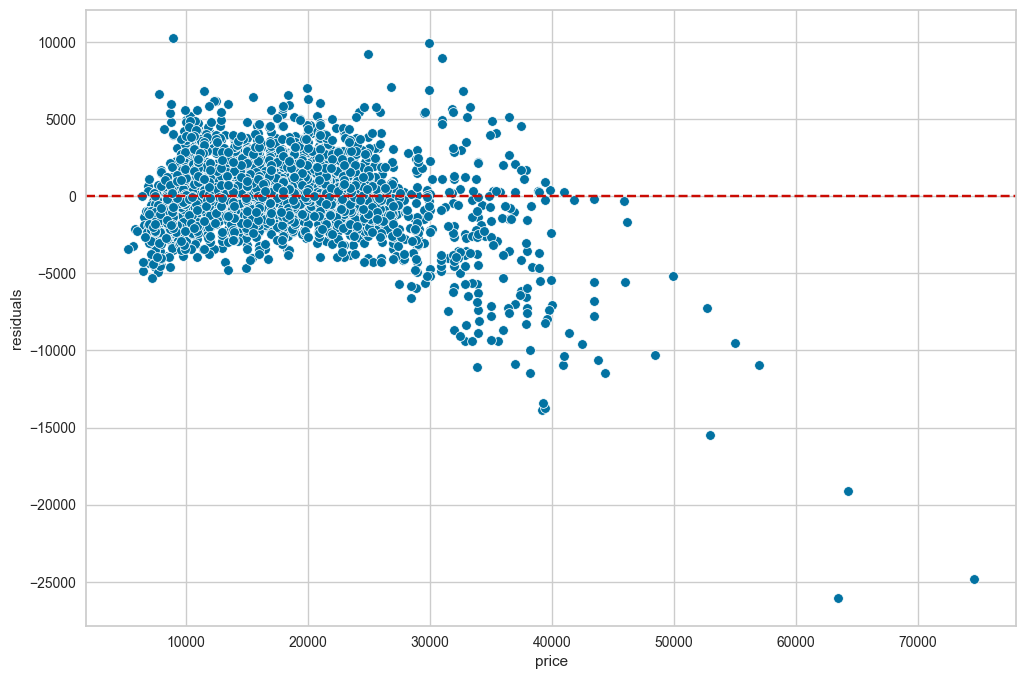

In [51]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [52]:
## Dropping observations from the dataset that worsen predictions
df1 = df[~(df.price>40000)]
df1.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [53]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [54]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

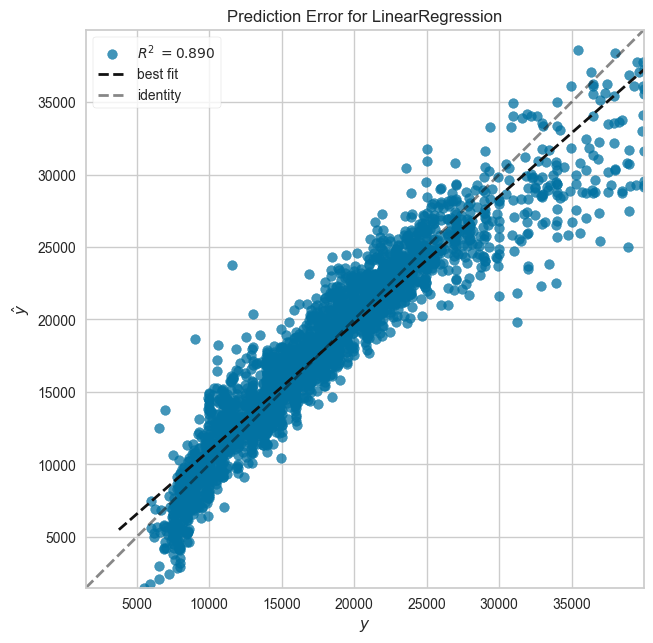

In [55]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [56]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.895,0.890
mae,1569.896,1576.380
mse,4758505.838,4996724.643
rmse,2181.400,2235.335


In [57]:
1894/df1.price.mean()

# Before removing outliers, average prediction error decreased from 13.81% to 10.93%.
# This resulted in an approximate 2.88% improvement in predictions.

0.10652264012950272

In [58]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [59]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [60]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
6188,9500,6982.296,2517.704
8558,10253,9570.687,682.313
6813,12925,12594.551,330.449
14499,10690,14263.112,-3573.112
15279,12990,20405.804,-7415.804
13862,17480,18385.350,-905.350
5706,24980,24015.980,964.020
11524,16890,17591.998,-701.998
2386,28990,24035.637,4954.363
14059,16945,18855.454,-1910.454


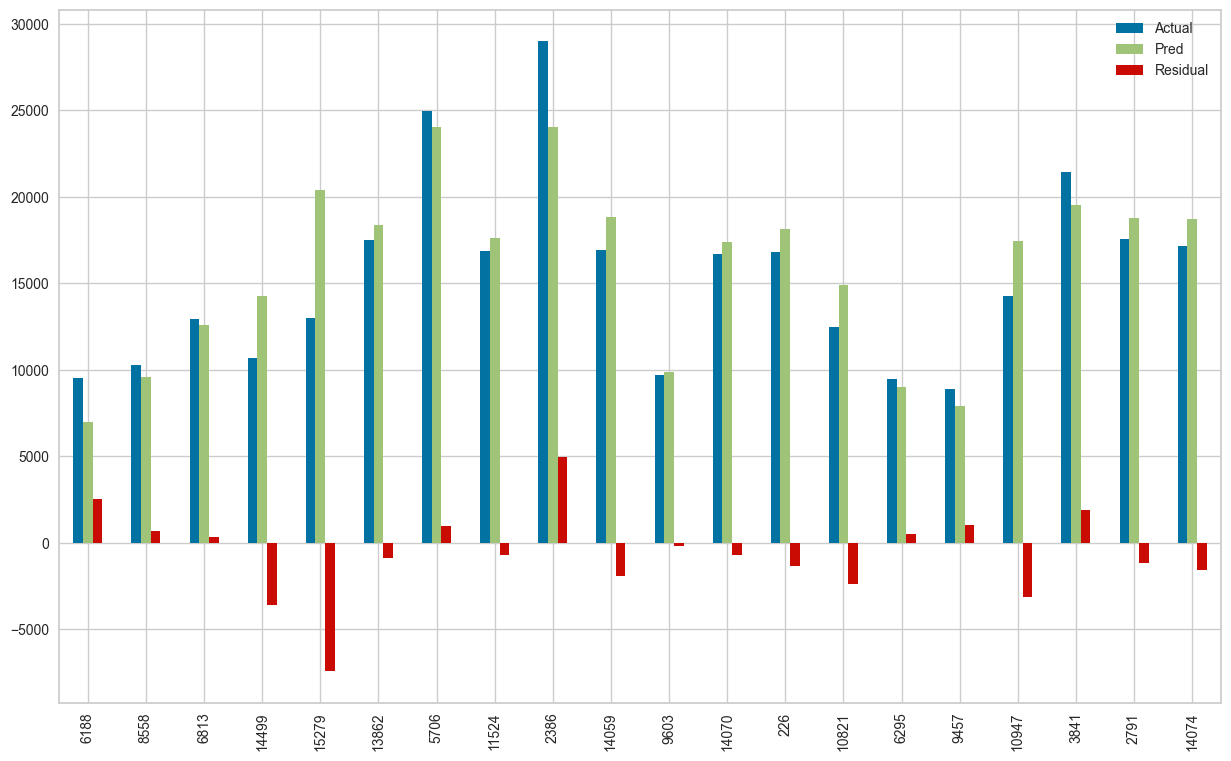

In [61]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

- A positive coefficient indicates that as the associated input feature increases, the target variable also increases.

- A negative coefficient indicates that as the associated input feature increases, the target variable decreases.

- The larger the absolute value of the coefficient, the greater the impact of the associated input feature on the target variable.

- If the coefficient is close to zero, the associated input feature has little to no effect on the target variable.

In [62]:
# We will use the coefficients to understand the impact of features on predictions and for feature selection.
# The order of the coefficients matches the order of the features in the X_train data provided for model training.

pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9547.565
make_model_Renault Clio,-5447.701
make_model_Opel Corsa,-5266.533
make_model_Opel Astra,-3423.330
Type_Employee's car,-2668.305
Type_Used,-2524.101
Drive_chain_rear,-2081.767
Type_Pre-registered,-1816.313
Gearing_Type_Manual,-1586.175
age,-1521.962


#### Pipeline
Using a **Pipeline** makes data science and machine learning workflows more efficient and reliable. It ensures that each step is applied in the correct order and only on the training data, preventing data leakage and improving the model's generalization ability. Additionally, it simplifies the model selection and parameter tuning process while reducing errors.

In [63]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

In [64]:
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)
 
# This first scales our data using MinMaxScaler and then trains a LinearRegression model on the scaled data.

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [65]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.895,-4617585982702172504064.000
mae,1576.847,8637246578227.588
mse,4787447.995,210228516103859384100304453632.000
rmse,2188.024,458506833213922.125


# Implement Ridge Regression

Ridge and Lasso regressions are regularized versions of linear regression. This regularization makes the model more robust against overfitting and can sometimes improve the overall performance of the model.

They help overcome some limitations of linear regression and allow us to create more generalizable and stable models.

- Which method to use depends on the dataset, the problem definition, and how flexible you want the model to be.

- To find a balance between these two regularization techniques, approaches like **Elastic Net** are also available.

### Scaling

In [66]:
# In the ridge regression algorithm, the data to be trained must be scaled. 
# This process ensures that all features are equally weighted by the model, addressing multicollinearity issues 
# and allowing the grouping of features into important and less important ones.

scaler = MinMaxScaler()
scaler.fit(X_train)  

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Scaling the target variable is not necessary for linear regression because the target variable is not used in calculating the coefficients.**

### Modeling

In [67]:
ridge_model = Ridge(alpha=1, random_state=42) # default alpha=1 

# Alpha is the regularization hyperparameter. As this value increases, the strength of the applied regularization also increases. 
# To overcome overfitting, this hyperparameter should be increased.

In [68]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [69]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.895,0.890
mae,1569.391,1575.897
mse,4760911.965,5000983.907
rmse,2181.951,2236.288


### Finding best alpha for Ridge

GridSearchCV is a hyperparameter optimization tool used to maximize the performance of a machine learning model. It systematically tests all possible hyperparameter combinations to determine the best-performing combination and trains the final model with it. This process is critically important to ensure the model makes more effective and accurate predictions.

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

# The GridSearchCV algorithm first requires a search space for the relevant hyperparameters.

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [72]:
ridge_model = Ridge(random_state=42) 

In [73]:
param_grid = {"alpha":alpha_space}

In [74]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error', # default value = R2
                          cv=10,  # default cv = 5
                          n_jobs = -1)

In [75]:
ridge_grid_model.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [76]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107,0.039,0.003,0.002,0.010,{'alpha': 0.01},-2206.040,-2187.272,-2138.703,-2293.851,-2167.621,-2188.190,-2153.278,-2239.367,-2331.574,-2333.939,-2223.984,68.690,5
1,0.085,0.005,0.003,0.001,1.020,{'alpha': 1.02},-2207.072,-2181.437,-2141.119,-2287.566,-2167.408,-2186.804,-2152.138,-2241.241,-2330.653,-2316.138,-2221.158,65.452,2
2,0.118,0.050,0.003,0.001,2.030,{'alpha': 2.03},-2211.164,-2177.425,-2143.830,-2284.239,-2168.046,-2186.446,-2152.229,-2243.729,-2332.001,-2309.119,-2220.823,64.249,1
3,0.132,0.062,0.007,0.013,3.040,{'alpha': 3.04},-2215.654,-2174.502,-2146.558,-2282.362,-2169.238,-2186.741,-2153.035,-2246.508,-2334.295,-2306.388,-2221.528,63.831,3
4,0.084,0.004,0.004,0.001,4.050,{'alpha': 4.05},-2220.123,-2172.326,-2149.244,-2281.348,-2170.807,-2187.487,-2154.304,-2249.432,-2337.038,-2305.837,-2222.795,63.788,4
5,0.089,0.009,0.003,0.001,5.060,{'alpha': 5.06},-2224.470,-2170.701,-2151.884,-2280.911,-2172.638,-2188.561,-2155.887,-2252.426,-2340.004,-2306.533,-2224.401,63.944,6
6,0.151,0.070,0.008,0.015,6.070,{'alpha': 6.07},-2228.672,-2169.502,-2154.483,-2280.888,-2174.651,-2189.877,-2157.693,-2255.446,-2343.077,-2307.998,-2226.229,64.212,7
7,0.083,0.006,0.003,0.001,7.080,{'alpha': 7.08},-2232.732,-2168.641,-2157.047,-2281.176,-2176.793,-2191.375,-2159.657,-2258.466,-2346.194,-2309.959,-2228.204,64.542,8
8,0.087,0.012,0.004,0.003,8.090,{'alpha': 8.09},-2236.658,-2168.055,-2159.584,-2281.704,-2179.022,-2193.013,-2161.737,-2261.470,-2349.319,-2312.250,-2230.281,64.909,9
9,0.136,0.061,0.004,0.002,9.100,{'alpha': 9.1},-2240.461,-2167.696,-2162.096,-2282.423,-2181.312,-2194.757,-2163.899,-2264.448,-2352.428,-2314.766,-2232.429,65.295,10


In [77]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.895,0.890
mae,1569.442,1575.968
mse,4766549.336,5007161.785
rmse,2183.243,2237.669


In [78]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [79]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

# Since grid models do not have the coef_ attribute, after finding the best hyperparameters with GridSearch, 
# we manually rebuild and train the model with the best hyperparameters to obtain the coefficients.

,Coef
km,-11408.861
make_model_Renault Duster,-8331.319
make_model_Renault Clio,-5429.972
make_model_Opel Corsa,-5313.817
age,-4609.432
make_model_Opel Astra,-3386.342
Type_Employee's car,-2651.269
Type_Used,-2515.185
Weight_kg,-2004.311
Type_Pre-registered,-1797.405


# Implement Lasso Regression

In [80]:
lasso_model = Lasso(random_state=42, alpha=1)

# The Lasso model also requires the data to be provided in a scaled form.

In [81]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [82]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.895,0.890
mae,1570.288,1575.054
mse,4771539.224,5006876.993
rmse,2184.385,2237.605


### Finding best alpha for Lasso

In [83]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [84]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [85]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.895,0.890
mae,1570.307,1575.015
mse,4771935.299,5007177.231
rmse,2184.476,2237.672


In [86]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [87]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11451.310
make_model_Renault Duster,-7783.620
make_model_Renault Clio,-5385.860
make_model_Opel Corsa,-5301.361
age,-4599.199
make_model_Opel Astra,-3378.766
Type_Employee's car,-2573.253
Type_Used,-2451.873
Type_Pre-registered,-1715.744
Weight_kg,-1662.309


# Implement Elastic-Net

It is a combination of Ridge Regression and Lasso techniques.

It has two separate regularization parameters to determine the strength of the regularization terms, allowing a balance between Ridge Regression and Lasso.

When the hyperparameter l1_ratio=1 is selected, it behaves like Lasso, and when l1_ratio=0 is selected, it behaves like Ridge. Generally, it leans towards Lasso.

In [88]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [89]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.605,0.604
mae,3252.905,3254.653
mse,17977434.941,18040051.237
rmse,4239.981,4247.358


### Finding best alpha and l1_ratio for ElasticNet

In [90]:
elastic_model = ElasticNet(random_state=42)

param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

**alpha**:
   - This parameter controls the overall strength of regularization.
   - When alpha = 0, ElasticNet applies no regularization.
   - As the alpha value increases, the strength of regularization also increases. This can help the model become more resistant to overfitting.

In [91]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [92]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.895,0.890
mae,1570.307,1575.015
mse,4771935.299,5007177.231
rmse,2184.476,2237.672


In [93]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importance

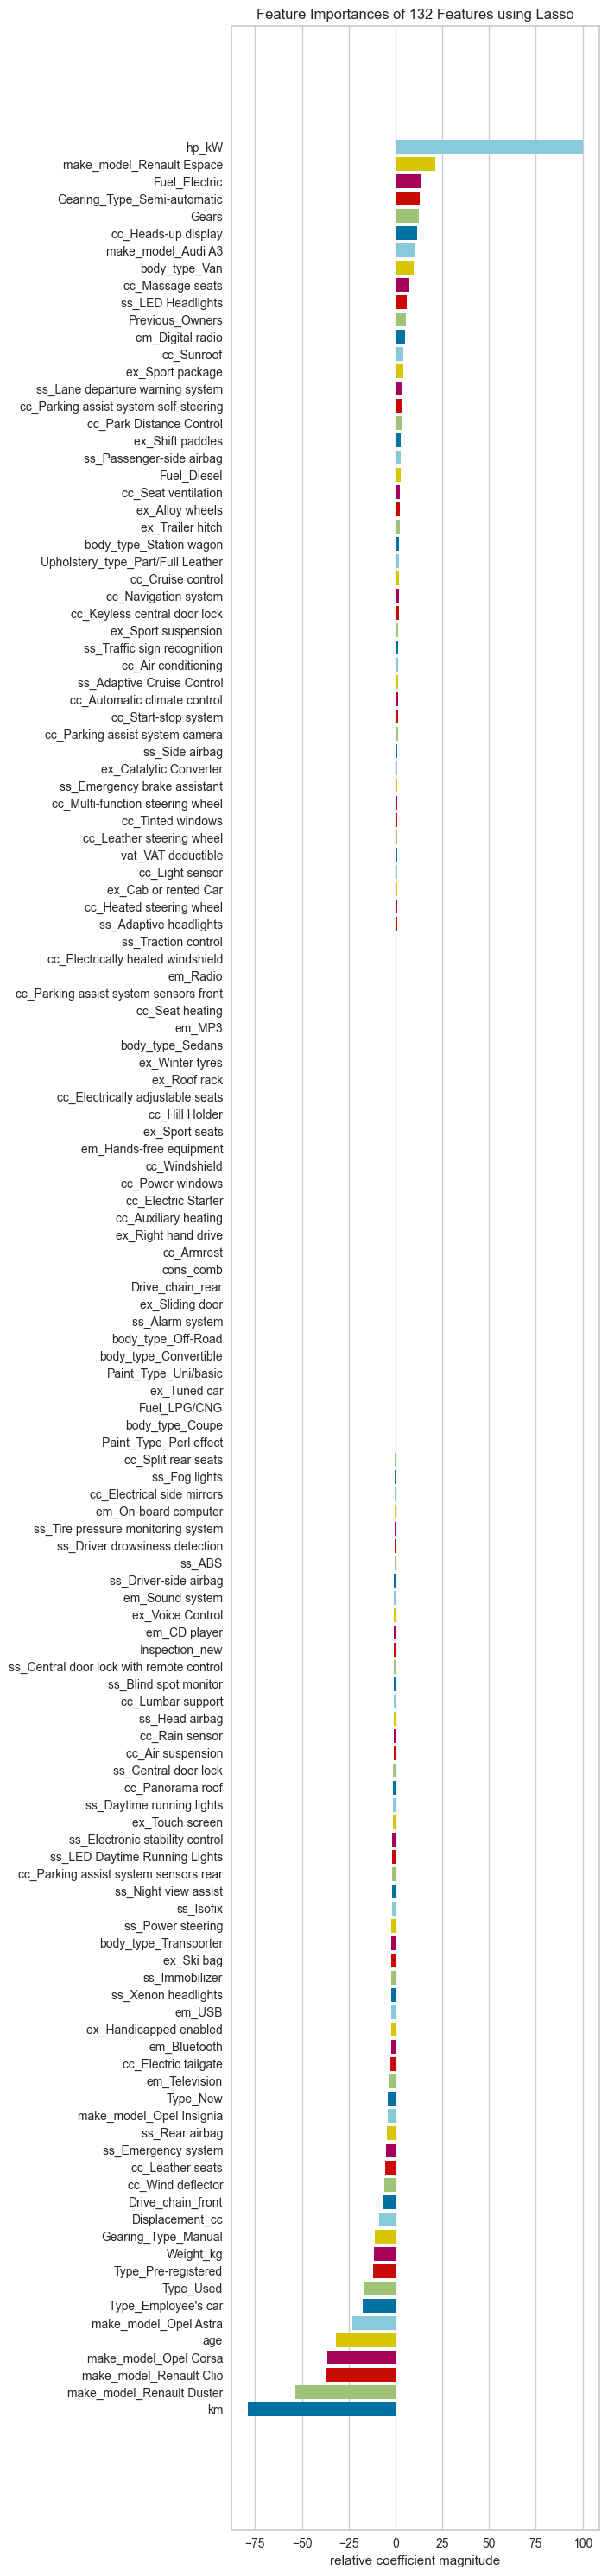

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [94]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

# Since we will perform feature selection, we remember to use the Lasso model.

In [95]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# Selecting the top 5 features that have the most impact on predictions.

In [96]:
df_new = df_new[~(df_new.price > 40000)]

In [97]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,False,True,False,False


In [98]:
# Based on new dataset with 6 features, we redefine X and y and rebuild the model.

X = df_new.drop(columns=["price"])
y = df_new.price

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [100]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)


In [102]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [103]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.856,0.860
mae,1834.232,1758.546
mse,6617869.076,6158709.899
rmse,2572.522,2481.675


In [104]:
2132 / df_new.price.mean()

0.12030872268558722

In [105]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [106]:
# Assign the metrics obtained from all models to the scores variable. 
# Then, take the transpose of the DataFrame so that model names appear in the index and metrics are displayed as features.

scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "final_m": {
        "r2_score": fm_R2,
        "mae": fm_mae,
        "rmse": fm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.890,1576.380,2235.335
ridge_m,0.890,1575.968,2237.669
lasso_m,0.890,1575.015,2237.672
elastic_m,0.890,1575.015,2237.672
final_m,0.860,1758.546,2481.675


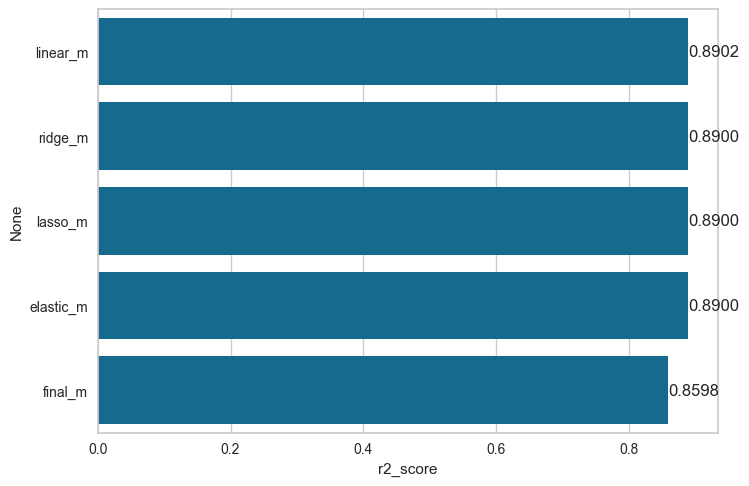

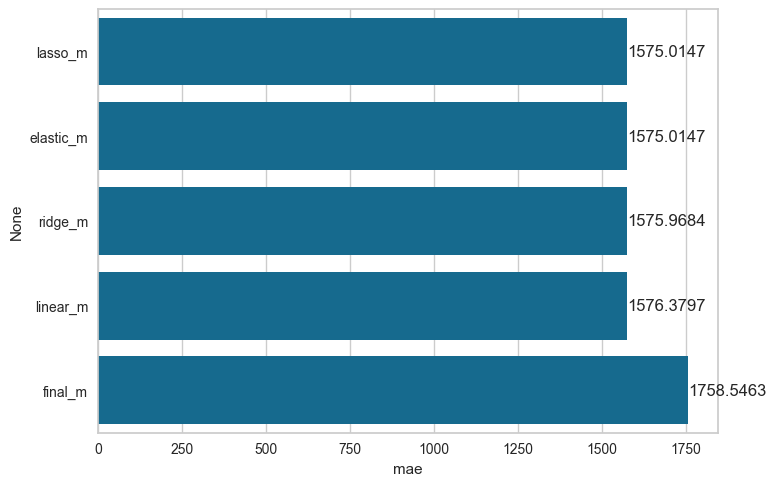

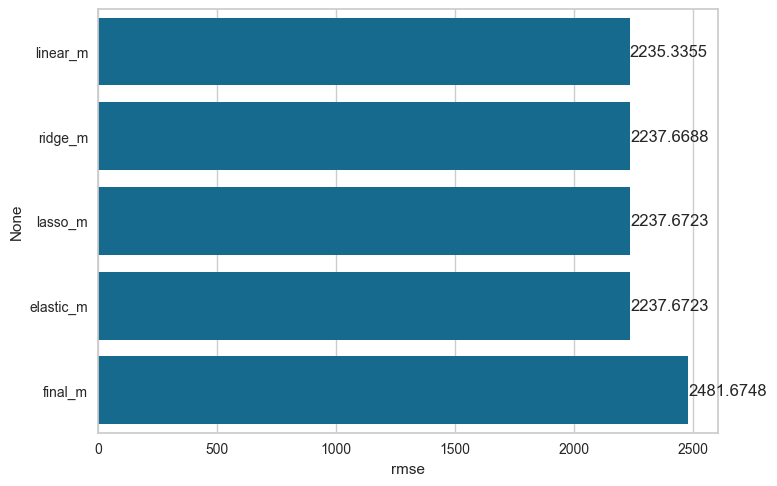

In [107]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False 
    else:
        ascending = True 
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

# Final Model

### Prediction with new observation

In [108]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [109]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [110]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [111]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [112]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [113]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,True,True


In [114]:
X.head(1)

# The feature order of the observation to be predicted must match the feature order of the data used for training.

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,True,False,False,False,False,False,False,False,False,True,False,False


In [115]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,0,True,0,0,0,0,0,0,True,0,0


In [116]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [117]:
final_model.predict(my_dict)

array([19266.94390226])

### Prediction with random samples

In [118]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [119]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [120]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [121]:
random_samples = df_new.sample(n=20)

X_random = random_samples.drop(columns=["price"])



In [122]:
X_random = final_scaler.transform(X_random)

In [123]:
predictions = final_model.predict(X_random)
predictions

array([ 8543.96732493, 20247.03980014, 16502.77542824, 18542.26554629,
       18760.12154231, 16824.6664607 , 18577.86142077, 25320.10030954,
       25730.73969885, 23340.7671969 , 16461.16652314,  5035.38593835,
       18960.4702755 , 17378.95433971, 15264.36913554, 18600.02861962,
       21015.63706751, 25370.9575074 , 23004.513069  , 15651.57255695])

In [124]:
true_labels = random_samples["price"].values
true_labels

array([ 9400, 18950, 15590, 18390, 17490, 15990, 18490, 31700, 22900,
       22900, 16390,  7950, 15300, 15770, 15000, 17990, 17990, 29702,
       22950, 12500], dtype=int64)

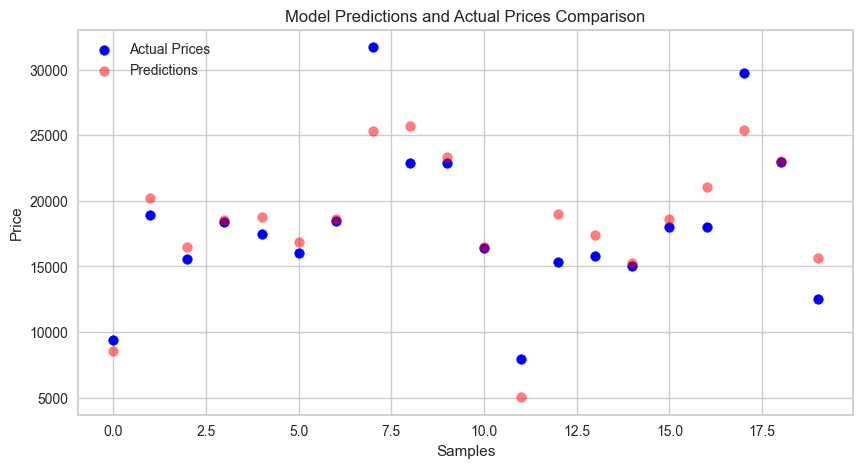

In [125]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='Actual Prices')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', alpha=0.5)
plt.title('Model Predictions and Actual Prices Comparison')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

 The proximity of the predicted prices to the actual prices suggests the model is performing reasonably well, though there is room for improvement, especially for certain outlier values.
 
 This plot highlights how well the model is performing in predicting the prices and where improvements may be needed.

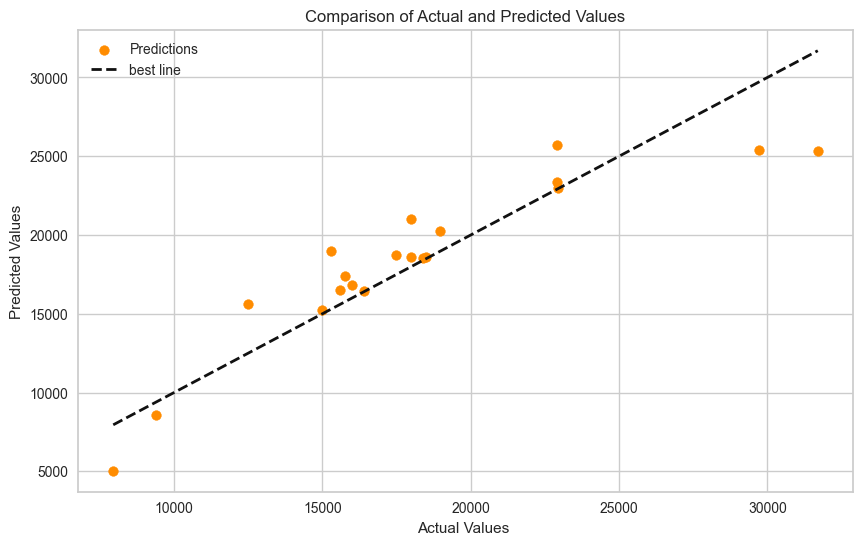

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='Predictions')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='best line')
plt.xlabel('Actual Values ')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

The trend shows a positive correlation between the actual and predicted values, as most of the points follow the slope of the dashed line, indicating that the model is capturing the overall trend in the data.

Overall, the model seems to perform well, with most predicted values being close to the actual ones. However, there are a few outliers where the model makes larger errors. These outliers could be further investigated to improve the model's performance.